This notebook outlines an engineering-economic assessment method for a global LEO satellite network.

The aim is to assess capacity per user and cost per user. 

In [1]:
import numpy as np
import math
import csv
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

Path Loss for A point on Earth and Starlink is given by
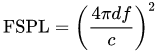
Where d=antenna diameter, f=frequency and c= speed of light

### Antenna Gain

In [84]:
def GT(): #D=Antenna diameter in m, f=Frequency in Hertz and n= antenna efficiency usually 0.6
    c=3.0*10**8 #c=speed of light
    D=0.7 # Antenna Diameter in metres
    f=13.5*10**9 #Transmission frequency
    n=0.6 #Antenna Efficiency
    λ=c/f # Calculated lambda= wavelength of the signal
    gain=10*(math.log10(n*((np.pi*D)/λ)**2))
    return gain
GT=GT()
print('Antenna Gain= '+str(GT)+ ' dB')

Antenna Gain= 37.690721033511124 dB


### Effective Isotropic Radiated Power (EIRP)

In [85]:
def eirp():
    gt=GT #Antenna Gain
    mw=30 #dBW to dBm
    Eirp=gt+mw
    return Eirp
EIRP=eirp()
print('EIRP= '+str(EIRP)+ ' dB')

EIRP= 67.69072103351112 dB


### Rain Attenuation (AL) and Other Losses (OL)

The rain attenuation is assumed to be 10dB and 0.53dB for the other losses (scintillation, cloud and gasesous attenuation) thus accounting for 10.53dB in total.

In [71]:
def trans_losses():
    RT=10 #Rain Attenuation
    OT=0.53 #All other losses
    total=RT+OT
    return total
losses=trans_losses()
print('Total Losses= '+str(losses)+ ' dB')

Total Losses= 10.53 dB


### Noise Power (N)

In [72]:
def Noise():
    k=1.38*10**-23                     #Boltzmann's constant k = 1.38×10−23 joules per kelvin
    T=290                              #Temperature of the receiver system T0 in kelvins
    B=0.25                             #Detection bandwidth (BW) in Hz
    Np=(10*(math.log10((k*T*1000))))+(10*(math.log10(B*10**9))) #Np=Noise power
    return Np
Noise=Noise()
print('Noise Power= '+str(Noise)+ ' dB')

Noise Power= -89.9978290702777 dB


### POWER RECEIVED (PR)

In [73]:
FSLP=0               #Ignoring FSLP at first so that it can be calculated for different values
def PR():
    pr=EIRP+GT-FSLP-losses
    return pr
PR=PR()
print('Power Received= '+str(PR)+ ' dB')

Power Received= 105.753100381124 dB


### CARRIER TO NOISE RATIO (CNR)

In [74]:
Noise=Noise
CNR=round(float((PR)-(Noise)),4)
print('CNR= '+str(CNR)+ ' dB')

CNR= 195.7509 dB


#### LEO SYSTEM MODEL APPLIED TO STARLINK

The subsequent function calculates the Signal to Noise Ratio, Received power and Free Space Path loss as dif

In [75]:
#Calculate spectral efficiency for ever signal ratio using APSK modulation table from
#ETSI EN 302 307-2 V1.2.1 (2020-08
def SEP(Signal_to_Noise_Ratio):
    if (Signal_to_Noise_Ratio>=4.73 and Signal_to_Noise_Ratio<5.12):
        spectral_efficiency=1.647211
    elif (Signal_to_Noise_Ratio>=5.13 and Signal_to_Noise_Ratio<5.96):
        spectral_efficiency=1.972253
    elif (Signal_to_Noise_Ratio>=5.97 and Signal_to_Noise_Ratio<6.54):
        spectral_efficiency=1.972253
    elif (Signal_to_Noise_Ratio>=6.55 and Signal_to_Noise_Ratio<6.83):
        spectral_efficiency=2.104850
    elif (Signal_to_Noise_Ratio>=6.84 and Signal_to_Noise_Ratio<7.5):
        spectral_efficiency=2.193247
    elif (Signal_to_Noise_Ratio>=7.51 and Signal_to_Noise_Ratio<7.79):
        spectral_efficiency=2.281645
    elif (Signal_to_Noise_Ratio>=7.8 and Signal_to_Noise_Ratio<7.40):
        spectral_efficiency=2.370043
    elif (Signal_to_Noise_Ratio>=7.41 and Signal_to_Noise_Ratio<8.0):
        spectral_efficiency=2.370043
    elif (Signal_to_Noise_Ratio>=8.1 and Signal_to_Noise_Ratio<8.37):
        spectral_efficiency=2.458441
    elif (Signal_to_Noise_Ratio>=8.38 and Signal_to_Noise_Ratio<8.42):
        spectral_efficiency=2.524739
    elif (Signal_to_Noise_Ratio>=8.43 and Signal_to_Noise_Ratio<9.26):
        spectral_efficiency=2.635236
    elif (Signal_to_Noise_Ratio>=9.27 and Signal_to_Noise_Ratio<9.70):
        spectral_efficiency=2.745734
    elif (Signal_to_Noise_Ratio>=9.71 and Signal_to_Noise_Ratio<10.64):
        spectral_efficiency=2.856231
    elif (Signal_to_Noise_Ratio>=10.65 and Signal_to_Noise_Ratio<11.98):
        spectral_efficiency=3.077225
    elif (Signal_to_Noise_Ratio>=11.99 and Signal_to_Noise_Ratio<11.09):
        spectral_efficiency=3.386618
    elif (Signal_to_Noise_Ratio>=11.1 and Signal_to_Noise_Ratio<11.74):
        spectral_efficiency=3.291954
    elif (Signal_to_Noise_Ratio>=11.75 and Signal_to_Noise_Ratio<12.16):
        spectral_efficiency=3.510192
    elif (Signal_to_Noise_Ratio>=12.17 and Signal_to_Noise_Ratio<13.04):
        spectral_efficiency=3.620536
    elif (Signal_to_Noise_Ratio>=13.05 and Signal_to_Noise_Ratio<13.97):
        spectral_efficiency=3.841226
    elif (Signal_to_Noise_Ratio>=13.98 and Signal_to_Noise_Ratio<14.8):
        spectral_efficiency=4.206428
    elif (Signal_to_Noise_Ratio>=14.81 and Signal_to_Noise_Ratio<15.46):
        spectral_efficiency=4.338659
    elif (Signal_to_Noise_Ratio>=15.47 and Signal_to_Noise_Ratio<15.86):
        spectral_efficiency=4.603122
    elif (Signal_to_Noise_Ratio>=15.87 and Signal_to_Noise_Ratio<16.54):
        spectral_efficiency=4.735354
    elif (Signal_to_Noise_Ratio>=16.55 and Signal_to_Noise_Ratio<17.72):
        spectral_efficiency=4.936639
    elif (Signal_to_Noise_Ratio>=17.73 and Signal_to_Noise_Ratio<18.52):
        spectral_efficiency=5.163248
    elif (Signal_to_Noise_Ratio>=18.53 and Signal_to_Noise_Ratio<16.97):
        spectral_efficiency=5.355556
    elif (Signal_to_Noise_Ratio>=16.98 and Signal_to_Noise_Ratio<17.23):
        spectral_efficiency=5.065690
    elif (Signal_to_Noise_Ratio>=17.24 and Signal_to_Noise_Ratio<18.0):
        spectral_efficiency=5.241514
    elif (Signal_to_Noise_Ratio>=18.1 and Signal_to_Noise_Ratio<18.58):
        spectral_efficiency=5.417338
    elif (Signal_to_Noise_Ratio>=18.59 and Signal_to_Noise_Ratio<18.83):
        spectral_efficiency=5.593162
    elif (Signal_to_Noise_Ratio>=18.84 and Signal_to_Noise_Ratio<19.56):
        spectral_efficiency=5.768987
    elif (Signal_to_Noise_Ratio>=19.57):
        spectral_efficiency=5.900855
    else:
        spectral_efficiency=1
    return spectral_efficiency

In [76]:
def generate_log_normal_dist_value(frequency, mu, sigma, draws, seed_value):
    if seed_value == None:
        pass
    else:
        frequency_seed_value = seed_value * frequency * 100
        np.random.seed(int(str(frequency_seed_value)[:2]))
    normal_std = np.sqrt(np.log10(1 + (sigma/mu)**2))
    normal_mean = np.log10(mu) - normal_std**2 / 2
    hs = np.random.lognormal(normal_mean, normal_std, draws)
    return hs

In [77]:
def uma_nlos_optional(Downlink_Frequency, distance, ant_height, ue_height,seed_value, iterations, Speed_of_light):
    path_loss = 10*(math.log10(((4*np.pi*distance*10**3)*Downlink_Frequency/Speed_of_light)**2))
    
    return (path_loss + random_variation)

In [78]:
def path_loss(sd,deviations):
    pl=[]
    for sd in deviations:
        loss=Free_Space_path_loss +sd
        pl.append(loss)
    return pl

In [79]:
iterations = 10
Total_Earth_Area=510000000                      #Area of Earth
Asset_Altitude=550                              #Altitude of starlink satellites
Downlink_Frequency=13.5*10**9                   #Downlink frequency in Hertz
Speed_of_light=3.0*10**8                        #Speed of light in vacuum
wavelength=Speed_of_light/Downlink_Frequency    #Downlink Wavelength in m
Received_power_less_FSLP=PR                     #Received power before subtracting Free space path loss
Carrier_to_Noise_Ratio=184.8493                      #Carrier noise ratio before subtracting noise power
Earth_area_covered=Total_Earth_Area*0.8         #Approximate area of earth covered
Receiver_bandwidth=0.25*10**9
seed_value = 44

In [80]:
def starlink_capacity(Number_of_assets):
    results_starlink = []
    for noa in Number_of_assets: #Return results for NoA, CPUA,ADA,MPD,FSPL,PR and SNR as satellites increase by 60
            Network_Density=noa/Earth_area_covered
            Coverage_area_per_asset=(Earth_area_covered/noa)
            Average_distance_between_assets=math.sqrt(((1)/Network_Density))/(2)
            Max_path_distance=math.sqrt(((Average_distance_between_assets)**2)+((Asset_Altitude)**2))
            random_variations = generate_log_normal_dist_value(Downlink_Frequency, 1, 7.8, iterations+1, seed_value)
            for i in range(0, iterations):
                Free_Space_path_loss=10*(math.log10(((4*np.pi*Max_path_distance*10**3)/wavelength)**2)) + random_variations[i]
                Received_power=Received_power_less_FSLP-Free_Space_path_loss
                Signal_to_Noise_Ratio=Carrier_to_Noise_Ratio-Free_Space_path_loss
                s=SEP(Signal_to_Noise_Ratio)  
                capacity=(s*Receiver_bandwidth)/(10**6)
                results_starlink.append({
                    'NoA': noa,
                    'iteration': i,
                    'CPUA': Coverage_area_per_asset,
                    'ADA': Average_distance_between_assets,
                    'MPD': Max_path_distance,
                    'FSPL': Free_Space_path_loss,
                    'PR': Received_power,
                    'SNR': Signal_to_Noise_Ratio,
                    'SE': s,
                    'CAP': capacity,
                    'CAP_km2': capacity / Coverage_area_per_asset,
                    'constellation': 'Starlink'
                })
    return results_starlink
satellites=(np.linspace(60,5040,84)).tolist() #Increase the satellites by 60 until 5000 have been launched
Number_of_assets=satellites
results_starlink = starlink_capacity(Number_of_assets) #Assign individual columns
results_starlink = pd.DataFrame(results_starlink)
results_starlink.to_csv("starlink.csv", index=False)
results_starlink.shape

(840, 12)

In [81]:
def oneweb(Number_of_assets):
    Asset_Altitude=1200                              #Altitude of starlink satellites
    Downlink_Frequency=13.5*10**9                   #Downlink frequency in Hertz
    Received_power_less_FSLP=PR                  #Received power before subtracting Free space path loss
    Carrier_to_Noise_Ratio=186.0478 
    results_oneweb = []
    for noa in Number_of_assets: #Return results for NoA, CPUA,ADA,MPD,FSPL,PR and SNR as satellites increase by 60
            Network_Density=noa/Earth_area_covered
            Coverage_area_per_asset=(Earth_area_covered/noa)
            Average_distance_between_assets=math.sqrt(((1)/Network_Density))/(2)
            Max_path_distance=math.sqrt(((Average_distance_between_assets)**2)+((Asset_Altitude)**2))
            random_variations = generate_log_normal_dist_value(Downlink_Frequency, 1, 7.8, iterations+1, seed_value)
            for i in range(0, iterations):
                Free_Space_path_loss=10*(math.log10(((4*np.pi*Max_path_distance*10**3)/wavelength)**2)) + random_variations[i]
                Received_power=Received_power_less_FSLP-Free_Space_path_loss
                Signal_to_Noise_Ratio=Carrier_to_Noise_Ratio-Free_Space_path_loss
                s=SEP(Signal_to_Noise_Ratio)  
                capacity=(s*Receiver_bandwidth)/(10**6)
                results_oneweb.append({
                    'NoA': noa,
                    'iteration': i,
                    'CPUA': Coverage_area_per_asset,
                    'ADA': Average_distance_between_assets,
                    'MPD': Max_path_distance,
                    'FSPL': Free_Space_path_loss,
                    'PR': Received_power,
                    'SNR': Signal_to_Noise_Ratio,
                    'SE': s,
                    'CAP': capacity,
                    'CAP_km2': capacity / Coverage_area_per_asset,
                    'constellation': 'OneWeb'
                })
    return results_oneweb
satellites=(np.linspace(30,1000,34)).tolist() #Increase the satellites by 60 until 5000 have been launched
Number_of_assets=satellites
results_oneweb = oneweb(Number_of_assets) #Assign individual columns
results_oneweb = pd.DataFrame(results_oneweb)
results_oneweb.to_csv("oneweb.csv", index=False)
results_oneweb.shape

(340, 12)

In [82]:
def kuiper(Number_of_assets):
    Asset_Altitude=610                              #Altitude of starlink satellites
    Downlink_Frequency=17.7*10**9                   #Downlink frequency in Hertz
    Received_power_less_FSLP=99.5570                  #Received power before subtracting Free space path loss
    Carrier_to_Noise_Ratio= 195.7509
    results_kuiper = []
    for noa in Number_of_assets: #Return results for NoA, CPUA,ADA,MPD,FSPL,PR and SNR as satellites increase by 60
            Network_Density=noa/Earth_area_covered
            Coverage_area_per_asset=(Earth_area_covered/noa)
            Average_distance_between_assets=math.sqrt(((1)/Network_Density))/(2)
            Max_path_distance=math.sqrt(((Average_distance_between_assets)**2)+((Asset_Altitude)**2))
            random_variations = generate_log_normal_dist_value(Downlink_Frequency, 1, 7.8, iterations+1, seed_value)
            for i in range(0, iterations):
                Free_Space_path_loss=10*(math.log10(((4*np.pi*Max_path_distance*10**3)/wavelength)**2)) + random_variations[i]
                Received_power=Received_power_less_FSLP-Free_Space_path_loss
                Signal_to_Noise_Ratio=Carrier_to_Noise_Ratio-Free_Space_path_loss
                s=SEP(Signal_to_Noise_Ratio)  
                capacity=(s*Receiver_bandwidth)/(10**6)
                results_kuiper.append({
                    'NoA': noa,
                    'iteration': i,
                    'CPUA': Coverage_area_per_asset,
                    'ADA': Average_distance_between_assets,
                    'MPD': Max_path_distance,
                    'FSPL': Free_Space_path_loss,
                    'PR': Received_power,
                    'SNR': Signal_to_Noise_Ratio,
                    'SE': s,
                    'CAP': capacity,
                    'CAP_km2': capacity / Coverage_area_per_asset,
                    'constellation': 'Kuiper'
                })
    return results_kuiper
satellites=(np.linspace(30,3236,108)).tolist() #Increase the satellites by 60 until 5000 have been launched
Number_of_assets=satellites
results_kuiper = kuiper(Number_of_assets) #Assign individual columns
results_kuiper = pd.DataFrame(results_kuiper)
results_kuiper.to_csv("kuiper.csv", index=False)
results_kuiper.shape

(1080, 12)

### DATA VISUALIZATION

No handles with labels found to put in legend.


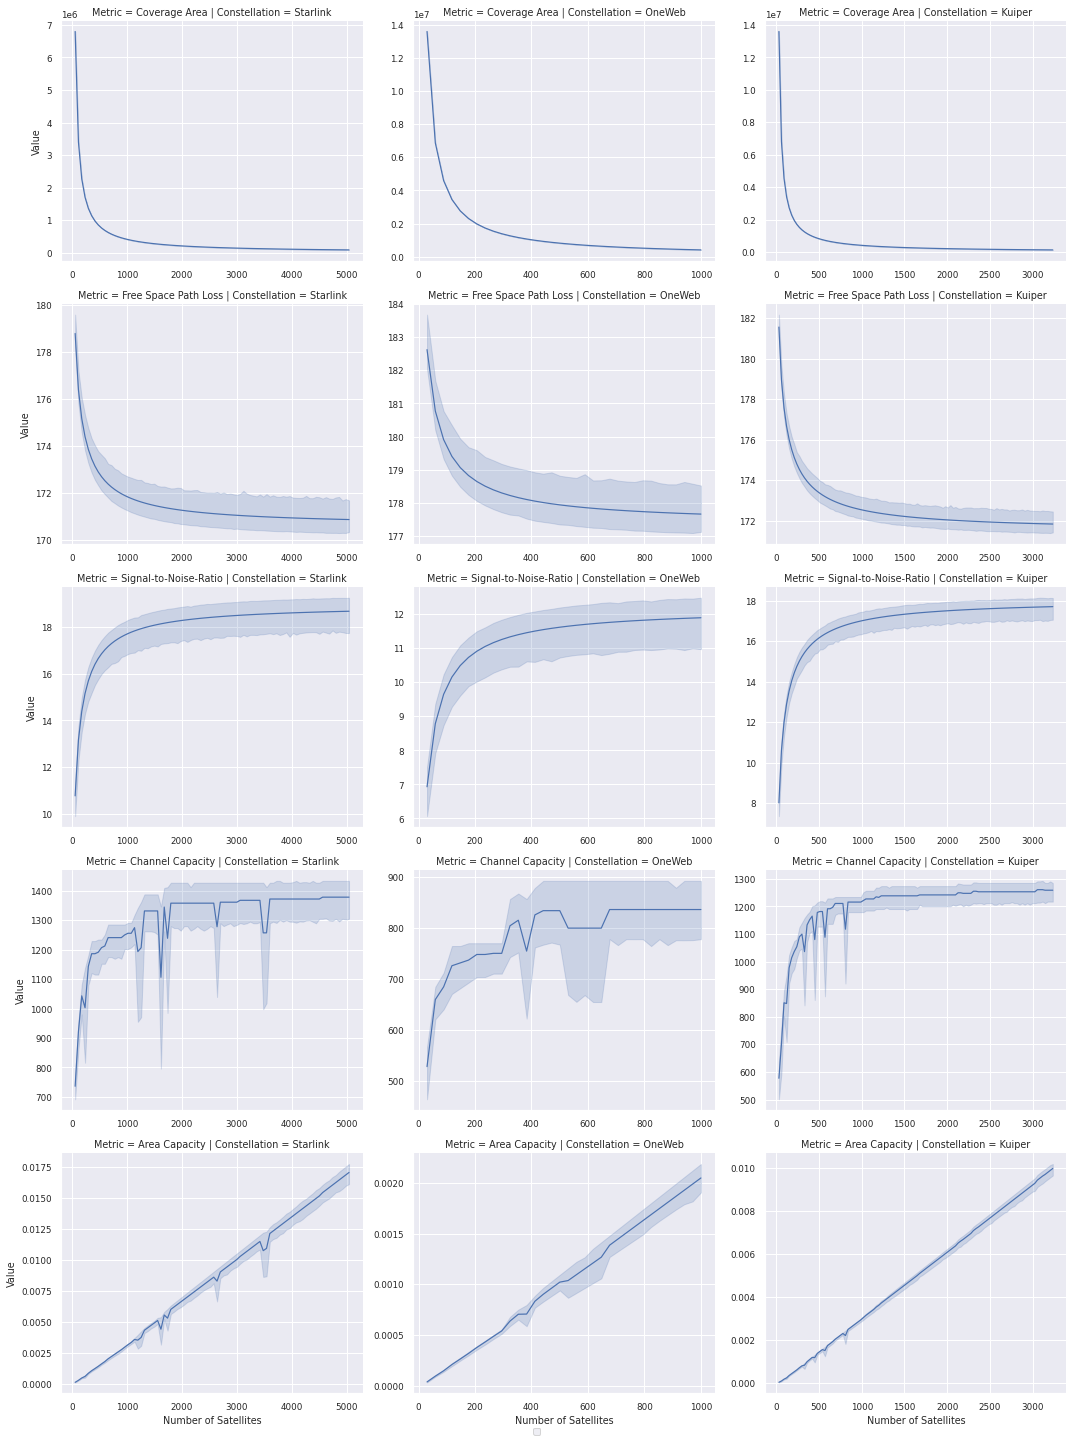

In [42]:
data_subset = results_starlink[['NoA', 'CPUA', 'MPD', 'FSPL', 'PR', 'SNR', 'SE', 'CAP', 'CAP_km2', 'constellation']]
data_subset2 = results_oneweb[['NoA', 'CPUA', 'MPD', 'FSPL', 'PR', 'SNR', 'SE', 'CAP', 'CAP_km2', 'constellation']]
data_subset3 = results_kuiper[['NoA', 'CPUA', 'MPD', 'FSPL', 'PR', 'SNR', 'SE', 'CAP', 'CAP_km2', 'constellation']]
all_data = [data_subset, data_subset2, data_subset3]
all_data = pd.concat(all_data)
all_data.shape
all_data.to_csv("Datasubset.csv", index=True)
all_data.columns = ['Number of Satellites', 'Coverage Area','Maximum Path Distance', 
                       'Free Space Path Loss', 'Received Power', 'Signal-to-Noise-Ratio', 
                       'Spectral Efficiency', 'Channel Capacity', 'Area Capacity', 'Constellation']
all_data = all_data[['Number of Satellites', 'Coverage Area','Free Space Path Loss',  
                       'Signal-to-Noise-Ratio', 'Channel Capacity', 'Area Capacity', 'Constellation']]
long_data = pd.melt(all_data,
    id_vars=['Number of Satellites', 'Constellation'],
    value_vars=['Coverage Area', 'Free Space Path Loss', 'Signal-to-Noise-Ratio', 'Channel Capacity', 'Area Capacity'])
long_data.columns = ['Number of Satellites', 'Constellation', 'Metric', 'Value']
sns.set(font_scale=.8) 
plot=sns.relplot(x='Number of Satellites', y='Value', linewidth=1.2,
    row="Metric",col="Constellation", 
    palette=sns.color_palette("bright", 3),
    kind="line", data=long_data,
    facet_kws=dict(sharex=False, sharey=False),
    legend="full")
handles = plot._legend_data.values()
labels = plot._legend_data.keys()
plot.fig.set_size_inches(15,20)
plot.fig.legend(handles=handles, labels=labels, loc='lower center',ncol=7)
plt.subplots_adjust(hspace=0.8, wspace=0.5, bottom=0.07)
plt.tight_layout()
plt.savefig('Engineering plots.png', dpi=300)

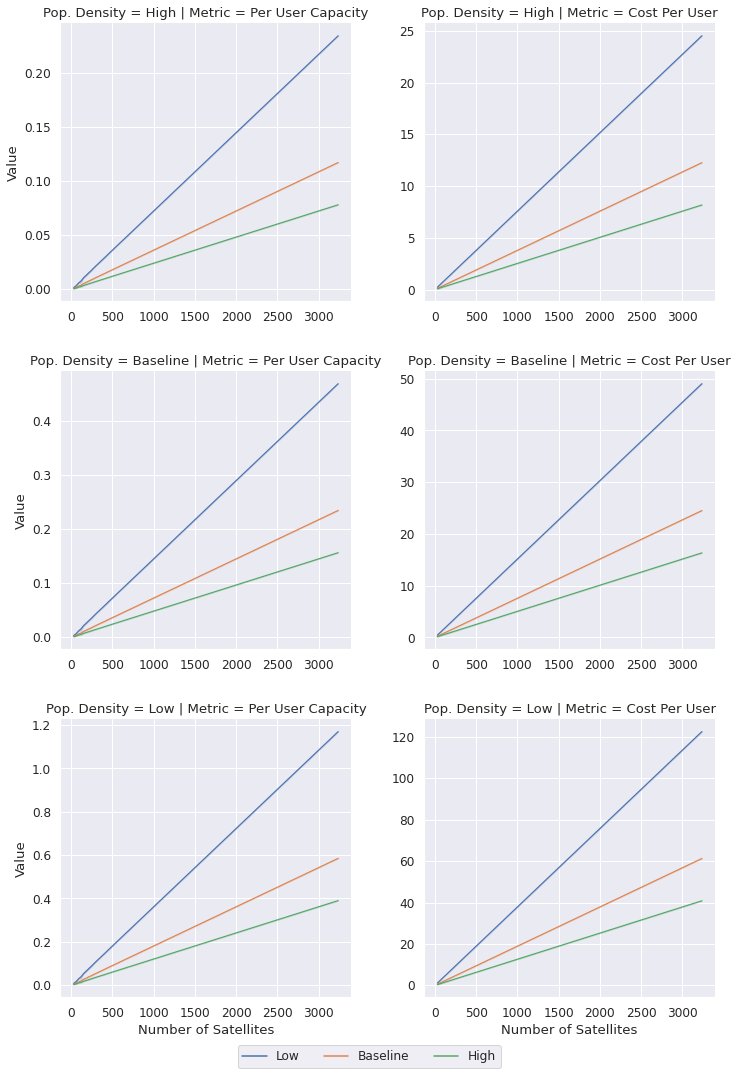

In [83]:
capacity_lut = results_kuiper[['NoA', 'CPUA', 'CAP']]
capacity_results = []
pop_densities = [
    'Low', 
    'Baseline', 
    'High'
]
scenarios = [
    'Low', 
    'Baseline', 
    'High'
]
cost_per_sat_npv = 3091597 
over_booking_factor = 20
for pop_density in pop_densities:   
    if pop_density == 'Low':
        persons_per_km = 2
    if pop_density == 'Baseline':
        persons_per_km = 5
    if pop_density == 'High':
        persons_per_km = 10           
    for scenario in scenarios:      
        if scenario == 'Low':
            penetration = 10
        if scenario == 'Baseline':
            penetration = 20
        if scenario == 'High':
            penetration = 30          
        subscribers = persons_per_km * (penetration/100)     
        for index, item in capacity_lut.iterrows():
            capacity_results.append({
                'scenario': scenario,
                'pop_density': pop_density,
#                 'subscribers': subscribers,
                'NoA': item['NoA'],
                'user_capacity': item['CAP'] / (item['CPUA'] * (subscribers/over_booking_factor)),
                'cost_per_user': cost_per_sat_npv / (item['CPUA'] * subscribers)
            })
capacity_results = pd.DataFrame(capacity_results) 
capacity_results.to_csv("costs.csv")
capacity_results.columns = ['Scenario', 'Pop. Density', 'Number of Satellites', 
                            'Per User Capacity', 'Cost Per User']
long_data = pd.melt(capacity_results,
    id_vars=['Scenario', 'Pop. Density', 'Number of Satellites'],
    value_vars=['Per User Capacity', 'Cost Per User'])
long_data.columns = ['Scenario', 'Pop. Density', 'Number of Satellites', 'Metric', 'Value']
sns.set(font_scale=1.1) 
plot.fig.set_size_inches(8,10)
palette_num = 6
plot=sns.relplot(x="Number of Satellites", y='Value', linewidth=1.2, hue='Scenario',
    col="Metric", row="Pop. Density", row_order=['High','Baseline', 'Low'], 
    kind="line", data=long_data,
    facet_kws=dict(sharex=False, sharey=False), legend='full')
handles = plot._legend_data.values()
labels = plot._legend_data.keys()
plot._legend.remove()
plot.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=9)
plt.subplots_adjust(hspace=0.25, wspace=0.25, bottom=0.07)
plt.savefig('Supply Costs Kuiper.png', dpi=300)